# Placement Data Analysis

## Comprehensive Data Exploration and Insights

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/rohitsingh/Downloads/placedata Clean.csv')
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [ ]:


df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [35]:
df.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

## Feature Engineering

In [ ]:

df['AcademicPerformanceScore'] = (
    df['CGPA'] * 0.6 + 
    (df['SSC_Marks'] / 100 * 20) + 
    (df['HSC_Marks'] / 100 * 20)
)

# 2. Extra-Curricular Engagement Score (40% weightage)
df['ExtraCurricularScore'] = (
    df['Internships'] * 2.5 + 
    df['Projects'] * 2 + 
    df['Workshops/Certifications'] * 1.5
)

# 3. Categorical Encoding for Placement Training
df['PlacementTrainingEncoded'] = pd.Categorical(df['PlacementTraining']).codes

# 4. Binary Placement Status
df['PlacementStatusBinary'] = (df['PlacementStatus'] == 'Placed').astype(int)

# Display new features
print("New Features Added:")
print(df[['AcademicPerformanceScore', 'ExtraCurricularScore', 
           'PlacementTrainingEncoded', 
          'PlacementStatusBinary']].describe())

New Features Added:
       AcademicPerformanceScore  ExtraCurricularScore  \
count              10000.000000          10000.000000   
mean                  33.350986              8.196000   
std                    3.587605              3.528708   
min                   26.300000              1.500000   
25%                   29.900000              6.000000   
50%                   33.400000              8.000000   
75%                   36.640000             11.500000   
max                   40.760000             15.500000   

       PlacementTrainingEncoded  PlacementStatusBinary  
count              10000.000000           10000.000000  
mean                   0.731800               0.419700  
std                    0.443044               0.493534  
min                    0.000000               0.000000  
25%                    0.000000               0.000000  
50%                    1.000000               0.000000  
75%                    1.000000               1.000000  
max       

# Student Performance Assessment

This code introduces two new features to assess student performance more comprehensively.

## Academic Performance Score  
The **Academic Performance Score** combines CGPA, SSC marks, and HSC marks using specific weightage:  
- **CGPA contributes 60%** (highest weight).  
- **SSC and HSC marks each contribute 20%**, after being converted to a fraction.  

This score emphasizes CGPA more while still considering school-level academic performance.

## Extra-Curricular Engagement Score  
The **Extra-Curricular Engagement Score** measures a student’s practical learning experience:  
- **Internships (weight: 2.5)** – Offer significant industry exposure.  
- **Projects (weight: 2)** – Reflect hands-on experience.  
- **Workshops/Certifications (weight: 1.5)** – Add value but to a lesser extent.  

## Conclusion:
By creating these two scores, the approach ensures that **academic performance (60%)** and **extracurricular engagement (40%)** are both considered, offering a well-rounded assessment of student capabilities.


# Groupby

In [37]:
# 1. Placement Rate by Placement Training
placement_training_analysis = df.groupby('PlacementTraining')['PlacementStatusBinary'].agg([
    ('total_students', 'count'),
    ('placed_students', 'sum'),
    ('placement_rate', lambda x: x.mean() * 100)
])
print("Placement Analysis by Placement Training:")
print(placement_training_analysis)

Placement Analysis by Placement Training:
                   total_students  placed_students  placement_rate
PlacementTraining                                                 
No                           2682              418       15.585384
Yes                          7318             3779       51.639792



# Placement Analysis by Placement Training  

## Conclusion  

The analysis shows a **significant impact** of placement training on student placement rates:  

- **Students without placement training** had a **low placement rate of 15.59%** (418 out of 2682).  
- **Students who received placement training** had a **much higher placement rate of 51.64%** (3779 out of 7318).  

This indicates that **placement training plays a crucial role** in improving students' chances of getting placed, with trained students having more than **three times** the placement success compared to those without training.


In [38]:
# 2. Performance Metrics by Extracurricular Activities
extracurricular_analysis = df.groupby('ExtracurricularActivities').agg({
    'AcademicPerformanceScore': ['mean', 'std'],
    'ExtraCurricularScore': ['mean', 'std'],
})
print("\nPerformance Analysis by Extracurricular Activities:")
print(extracurricular_analysis)


Performance Analysis by Extracurricular Activities:
                          AcademicPerformanceScore            \
                                              mean       std   
ExtracurricularActivities                                      
No                                       30.733729  2.539440   
Yes                                      35.204616  3.021985   

                          ExtraCurricularScore            
                                          mean       std  
ExtracurricularActivities                                 
No                                    6.035818  2.491599  
Yes                                   9.725914  3.350986  


# Performance Analysis by Extracurricular Activities  

## Conclusion  

The analysis reveals a **positive correlation between extracurricular activities and student performance**:  

- **Students involved in extracurricular activities** have a **higher average Academic Performance Score (35.20)** compared to those who are not involved (**30.73**). This suggests that participation in extracurriculars may be linked to better academic performance.  
- **ExtraCurricularScore is significantly higher (9.73) for students engaged in extracurricular activities**, compared to **6.04 for non-participants**, indicating that these students are more actively involved in additional learning experiences.  
- The **standard deviations show more variation** among students involved in extracurricular activities, suggesting diverse levels of engagement and performance.  

Overall, students who participate in extracurricular activities tend to perform better academically and have higher engagement scores, highlighting the **potential benefits of a balanced academic and extracurricular approach**.


## 1. Placement Status Analysis

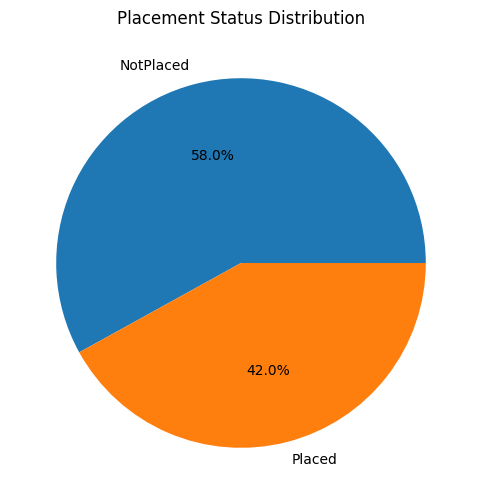

Placement Status Breakdown:
 col_0            count
PlacementStatus       
NotPlaced         5803
Placed            4197


In [39]:
# Placement Status Distribution
plt.figure(figsize=(10, 6))
df['PlacementStatus'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Placement Status Distribution')
plt.ylabel('')
plt.show()

# Placement Status Breakdown
placement_breakdown = pd.crosstab(df['PlacementStatus'], columns='count')
print('Placement Status Breakdown:\n', placement_breakdown)

## Conclusion:

### Overall Placement Rate:
- **42% of students are Placed** (orange section).  
- **58% of students are Not Placed** (blue section).  
- This suggests that **less than half of the students secured placements**, indicating a **competitive or challenging job market**.


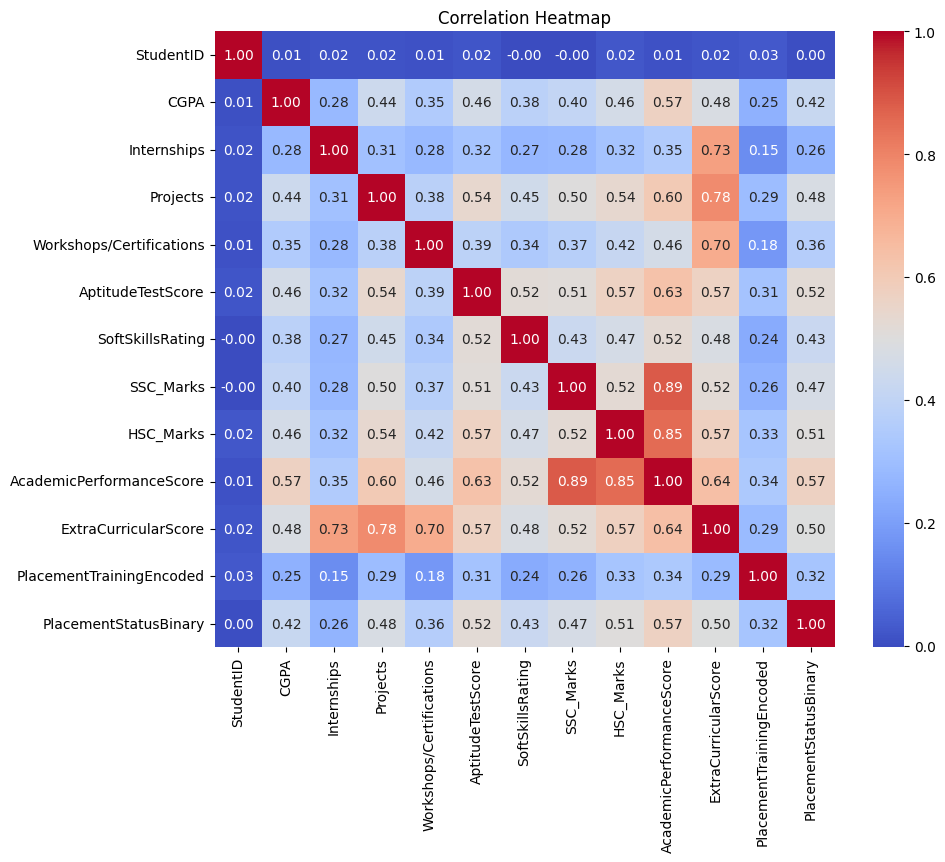

In [40]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Correlation Heatmap Analysis  

This heatmap visualizes the correlation between various student performance factors and placement outcomes.  

## Key Insights  

### 1. Placement Status Correlation  
- **Factors positively influencing placement success**:  
  - CGPA (0.42)  
  - Internships (0.26)  
  - Projects (0.48)  
  - Aptitude Test Score (0.52)  
  - Soft Skills Rating (0.43)  
  - Academic Performance Score (0.57)  
  - Extra-Curricular Score (0.50)  

- **Strongest predictors of placement**:  
  - Aptitude Test Score and Academic Performance Score  
  - Projects and Extra-Curriculars also contribute significantly  

### 2. Academic Performance Influence  
- SSC Marks (0.89) and HSC Marks (0.85) strongly correlate with Academic Performance Score.  
- Past academic achievements directly impact overall performance.  

### 3. Impact of Projects & Internships  
- Projects (0.78) and Internships (0.73) correlate highly with Extra-Curricular Score.  
- Projects (0.48) have a strong correlation with Placement Status.  

### 4. The Role of Soft Skills  
- Soft Skills Rating correlates positively with:  
  - Aptitude Test Score (0.52)  
  - Placement Status (0.43)  
- Strong soft skills and aptitude enhance employability.  

---

## Conclusion  
- A mix of academic excellence, aptitude, soft skills, and hands-on experience (projects/internships) improves placement chances.  
- Soft skills and aptitude tests play a crucial role in employability.  
- Students should focus on holistic development, including academics, extracurriculars, and skill-building,


# Exploratory Data Analysis (EDA)

/var/folders/w2/ktjkh9ln7f9b085y_4bqhb380000gn/T/ipykernel_8672/2003285046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PlacementStatus', y='CGPA', data=df, palette='Set2')


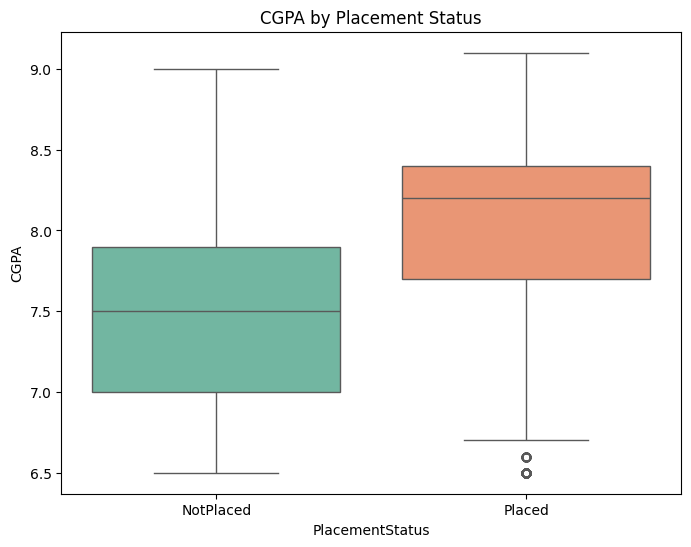

In [41]:
# Boxplot for CGPA by Placement Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='PlacementStatus', y='CGPA', data=df, palette='Set2')
plt.title('CGPA by Placement Status')
plt.show()

## Conclusion

1. **Placed students have a higher median CGPA** than Not Placed students, indicating that a higher CGPA improves placement chances.  

2. **Placed students have a narrower CGPA spread,** showing more consistency, while Not Placed students have a wider CGPA range, indicating more variability in academic performance.  

3. **Some Placed students with lower CGPA appear as outliers,** suggesting that a few secured placements despite having relatively low academic scores.  

4. **While CGPA is not the sole factor,** students with a higher CGPA generally have better placement outcomes.  


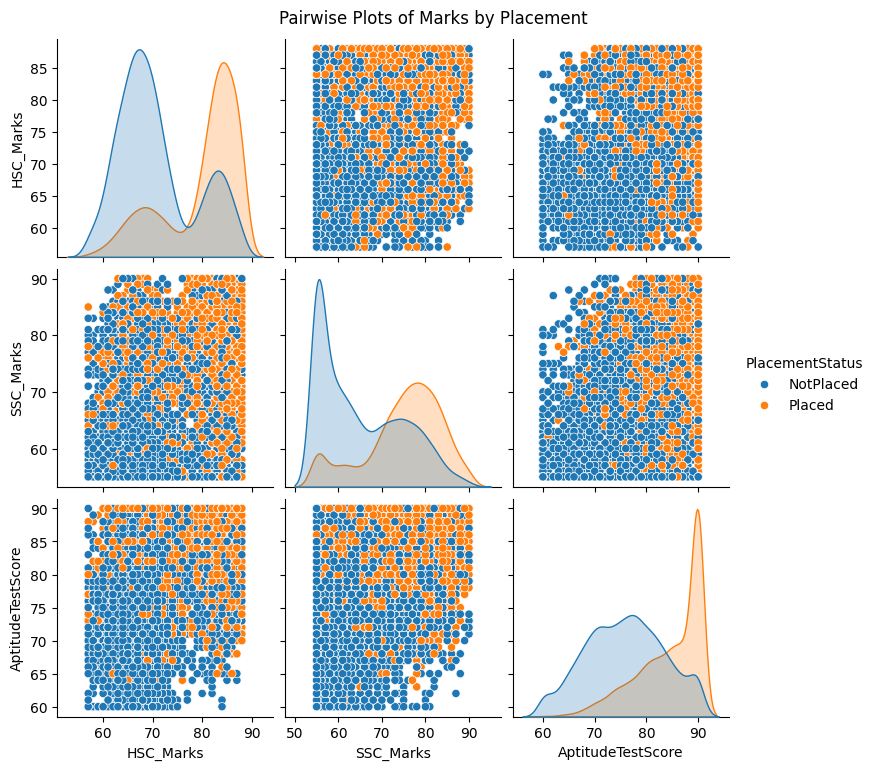

In [49]:
sns.pairplot(df, hue='PlacementStatus', vars=['HSC_Marks', 'SSC_Marks', 'AptitudeTestScore'])
plt.suptitle('Pairwise Plots of Marks by Placement', y=1.02)
plt.show()

# Conclusion:
## Pairwise Analysis of Marks and Placement

- **HSC Marks Distribution:** Placed students generally have higher HSC marks compared to those not placed, with two peaks in the HSC marks distribution for placed students, suggesting that a certain threshold of HSC marks might improve placement chances.  
- **SSC Marks Distribution:** The distribution of SSC marks is more spread out for both placed and not placed students, with no strong separation between placed and not placed students solely based on SSC marks, suggesting SSC marks alone may not be a key determinant of placement.  
- **Aptitude Test Score Distribution:** Placed students generally have higher aptitude test scores, with the density plot showing a peak at the higher end for placed students, indicating that a strong aptitude test performance increases placement chances.  
- **Pairwise Relationships:**  
  - **HSC vs. SSC Marks:** No clear separation is seen, meaning that having high marks in both doesn’t guarantee placement.  
  - **Aptitude Test Score vs. HSC/SSC Marks:** There is a higher concentration of placed students with high aptitude test scores, suggesting that a combination of high aptitude test scores and academic performance (especially HSC marks) is more predictive of placement.  


# 2. Placement Training Effect on Placement

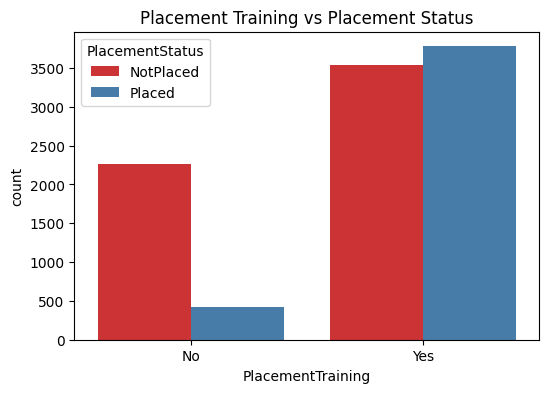

In [42]:
# Countplot for Placement Training
plt.figure(figsize=(6, 4))
sns.countplot(x='PlacementTraining', hue='PlacementStatus', data=df, palette='Set1')
plt.title('Placement Training vs Placement Status')
plt.show()

## Conclusion

1. **Students who received placement training** had a significantly higher placement rate, suggesting that training positively impacts employability.  

2. **Students without placement training** had a much lower placement rate, implying that lack of training reduces placement chances.  

3. **Placement training significantly increases job prospects** by improving students' readiness through enhanced aptitude, technical knowledge, and interview skills.  


## 3. Extracurricular Impact on Placement

Placement Percentage by Extracurricular Activities:
 PlacementStatus            NotPlaced     Placed
ExtracurricularActivities                      
No                         86.324168  13.675832
Yes                        37.991117  62.008883


<Figure size 1200x600 with 0 Axes>

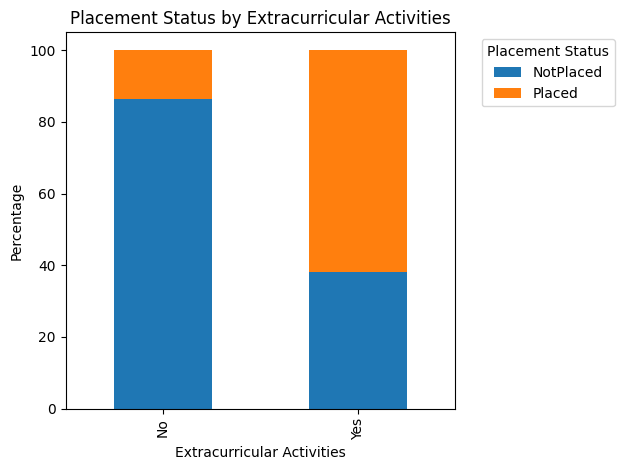

In [43]:
# Extracurricular Activities vs Placement
extracurricular_placement = pd.crosstab(df['ExtracurricularActivities'], df['PlacementStatus'], normalize='index') * 100
print('Placement Percentage by Extracurricular Activities:\n', extracurricular_placement)

plt.figure(figsize=(12, 6))
extracurricular_placement.plot(kind='bar', stacked=True)
plt.title('Placement Status by Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Percentage')
plt.legend(title='Placement Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Conclusion  

- **Students who participated in extracurricular activities** had a significantly higher placement rate, highlighting the positive impact of these activities on employability.  

- **Students without extracurricular involvement** had a much lower placement rate, suggesting that a lack of such activities may reduce placement chances.  

- **Extracurricular activities enhance key skills** like leadership, teamwork, and time management, which likely contribute to better job prospects.  


## Cumulative Performance Impact

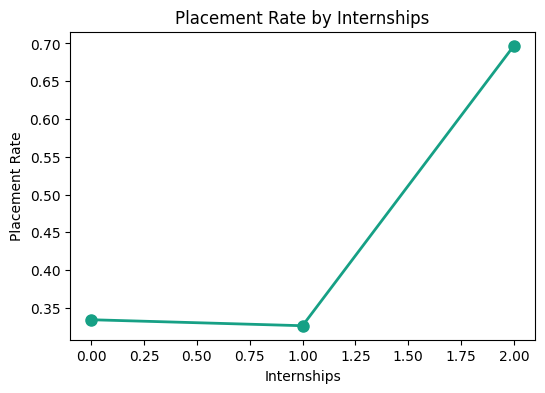

In [44]:
3# Placement Rate byb Internships

# Group by Internships and calculate placement rate
internship_placement = df.groupby('Internships')['PlacementStatusBinary'].mean()

# Plot the data
plt.figure(figsize=(6, 4))
internship_placement.plot(kind='line', marker='o', color='#16a085', linewidth=2, markersize=8)

# Set title and labels
plt.title('Placement Rate by Internships', fontsize=12)
plt.xlabel('Internships', fontsize=10)
plt.ylabel('Placement Rate', fontsize=10)

# Show plot
plt.show()


# Placement Rate by Internships

- Students with no or one internship have a low placement rate (~35%).  
- Those with two internships see a sharp increase in placement rate (~70%).  
- Internships significantly boost placement chances, especially when students complete at least two.


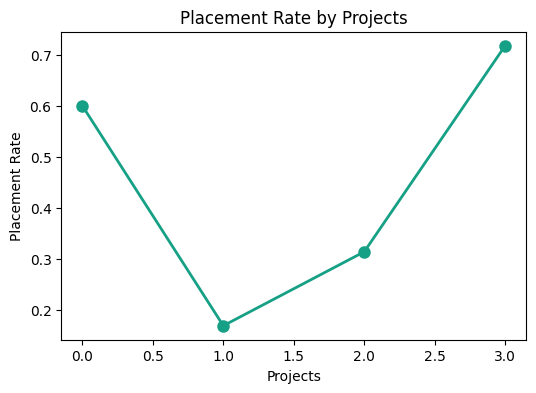

In [46]:
# Group by Projects and calculate placement rate
project_placement = df.groupby('Projects')['PlacementStatusBinary'].mean()

# Plot the data
plt.figure(figsize=(6, 4))
project_placement.plot(kind='line', marker='o', color='#16a085', linewidth=2, markersize=8)
plt.title('Placement Rate by Projects', fontsize=12)
plt.xlabel('Projects', fontsize=10)
plt.ylabel('Placement Rate', fontsize=10)
plt.show()


---
## Placement Rate by Projects

- Students with one project have the lowest placement rate (~20%).  
- The placement rate increases after two projects and reaches ~70% at three projects.  
- Working on multiple projects (especially 3 or more) strongly enhances placement probability.


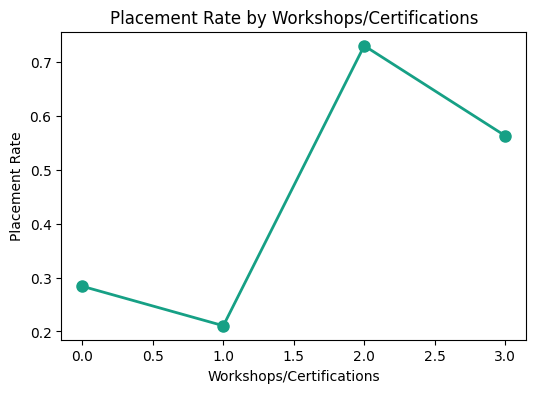

In [47]:
# Group by Workshops/Certifications and calculate placement rate
workshop_placement = df.groupby('Workshops/Certifications')['PlacementStatusBinary'].mean()

# Plot the data
plt.figure(figsize=(6, 4))
workshop_placement.plot(kind='line', marker='o', color='#16a085', linewidth=2, markersize=8)
plt.title('Placement Rate by Workshops/Certifications', fontsize=12)
plt.xlabel('Workshops/Certifications', fontsize=10)
plt.ylabel('Placement Rate', fontsize=10)
plt.show()


# Placement Rate by Workshops/Certifications

- Students with one workshop/certification have a lower placement rate (~20%) than those with none.  
- The highest placement rate (~72%) occurs at two workshops/certifications.  
- Two workshops/certifications provide the best advantage, but beyond that, additional certifications don’t significantly improve placement chances.


---
# Overall Conclusion from the Placement Data Analysis Notebook  

The Jupyter Notebook focuses on analyzing student placement data to identify key factors influencing placement success. Below are the main conclusions drawn from the analysis:  

## Key Influencing Factors for Placement Success  
- Academic performance (**CGPA, SSC, and HSC marks**) strongly correlates with placement probability.  
- Extracurricular involvement, including **internships, projects, and workshops/certifications**, plays a significant role in improving placement chances.  
- **Aptitude Test Scores and Soft Skills Ratings** positively impact employability.  

## Feature Engineering for Better Insights  
- The dataset includes newly derived features such as **Academic Performance Score** and **Extra-Curricular Engagement Score**, helping in better assessment.  
- A binary **Placement Status** variable is created to simplify classification.  

## Data Visualization and Correlation Findings  
- A **heatmap analysis** revealed strong correlations between academic performance, internships, and placement outcomes.  
- **Soft skills and aptitude scores** showed moderate correlations, emphasizing their importance in securing placements.  

## Practical Implications  
- Students should focus on a **balanced mix of academics, internships, projects, and soft skills development** to maximize placement opportunities.  
- Placement training programs should prioritize **aptitude test preparation and soft skill enhancement** alongside technical knowledge.  

## Final Takeaway  
The study confirms that a **holistic approach—strong academic foundation, practical experience (internships/projects), and well-developed soft skills—significantly increases a student’s chances of securing a placement**.  
